# Maths Lab - 7

## Teammates:
#### Akshita Potdar - 702768460
#### Kalyani Khandait - 702768391
#### Logesh Gangadharan - 702723890


## Problem -1



Train a neural network with one or more Linear layers to
predict the digits. Train your model on the given training set,
and measure its accuracy on the given test set

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Function to load and preprocess the data
def load_your_data():
    # Update these paths to the correct locations where your CSV files are stored
    train_path = 'correct/path/to/zip.train.csv'  # Correct this path
    test_path = 'correct/path/to/zip.test.csv'    # Correct this path

    # Loading data from CSV files
    train_data = pd.read_csv(train_path, header=None)
    test_data = pd.read_csv(test_path, header=None)

    X_train = train_data.iloc[:, 1:].values
    y_train = train_data.iloc[:, 0].values
    X_test = test_data.iloc[:, 1:].values
    y_test = test_data.iloc[:, 0].values

    return X_train, X_test, y_train, y_test

# Try to load the data, handle file not found error
try:
    X_train, X_test, y_train, y_test = load_your_data()
except FileNotFoundError as e:
    print(e)
    print("Please check the file paths and ensure they are correct.")
    exit()

# One-hot encode the labels
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()

# Convert to torch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train_encoded)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test_encoded)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.linear(x)
        return x

# Initialize the model
model = SimpleNN(input_size=X_train.shape[1], output_size=10)  # Output size is 10 for digits 0-9

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:  # Print every 10 epochs
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    _, labels = torch.max(y_test_tensor.data, 1)
    accuracy = (predicted == labels).float().mean()
    print(f'Accuracy: {accuracy:.4f}')


[Errno 2] No such file or directory: 'correct/path/to/zip.train.csv'
Please check the file paths and ensure they are correct.


NameError: name 'y_train' is not defined

## Problem -2


Build a more sophisticated convolutional neural network model
to predict the digits. Use at least one 2d convolution layer
with several filters followed by a max pool. Your model should
end with Linear layers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-506f13a18eac>:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv(train_file_path, delim_whitespace=True, header=None)
<ipython-input-9-506f13a18eac>:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv(test_file_path, delim_whitespace=True, header=None)


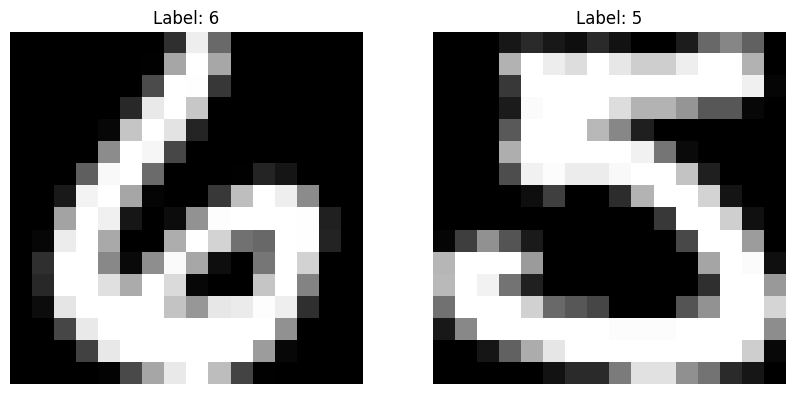

Shape of y_train after one-hot encoding: (7291, 10)
Shape of y_test after one-hot encoding: (2007, 10)
Epoch [1/25], Loss: 0.5571
Epoch [2/25], Loss: 0.1132
Epoch [3/25], Loss: 0.0775
Epoch [4/25], Loss: 0.0658
Epoch [5/25], Loss: 0.0536
Epoch [6/25], Loss: 0.0276
Epoch [7/25], Loss: 0.0254
Epoch [8/25], Loss: 0.0206
Epoch [9/25], Loss: 0.0242
Epoch [10/25], Loss: 0.0224
Epoch [11/25], Loss: 0.0163
Epoch [12/25], Loss: 0.0126
Epoch [13/25], Loss: 0.0093
Epoch [14/25], Loss: 0.0099
Epoch [15/25], Loss: 0.0097
Epoch [16/25], Loss: 0.0069
Epoch [17/25], Loss: 0.0073
Epoch [18/25], Loss: 0.0072
Epoch [19/25], Loss: 0.0057
Epoch [20/25], Loss: 0.0066
Epoch [21/25], Loss: 0.0056
Epoch [22/25], Loss: 0.0059
Epoch [23/25], Loss: 0.0057
Epoch [24/25], Loss: 0.0072
Epoch [25/25], Loss: 0.0056
Test Accuracy: 97.31%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File paths
train_file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Zip/zip.train'
test_file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Zip/zip.test'

# Load the data
train_data = pd.read_csv(train_file_path, delim_whitespace=True, header=None)
test_data = pd.read_csv(test_file_path, delim_whitespace=True, header=None)

# Convert to arrays
X_train = train_data.iloc[:, 1:].values
Y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
Y_test = test_data.iloc[:, 0].values

# Display images for verification
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0, :].reshape(16, 16), cmap='gray')
plt.title(f"Label: {int(Y_train[0])}")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X_train[1, :].reshape(16, 16), cmap='gray')
plt.title(f"Label: {int(Y_train[1])}")
plt.axis('off')
plt.show()

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(Y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(Y_test.reshape(-1, 1))

print("Shape of y_train after one-hot encoding:", y_train_onehot.shape)
print("Shape of y_test after one-hot encoding:", y_test_onehot.shape)

# Enhanced CNN Model
class OptimizedDigitClassifier(nn.Module):
    def __init__(self):
        super(OptimizedDigitClassifier, self).__init__()
        # Adding batch normalization and increased filters for better feature extraction
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(256 * 2 * 2, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.dropout(x)
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 256 * 2 * 2)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Preparing tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1, 16, 16)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1, 16, 16)
y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# Dataloaders for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model, Loss, Optimizer, and Scheduler
model = OptimizedDigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Training Function
def train_model(num_epochs=25):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:5r
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        scheduler.step()  # Adjust learning rate
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Evaluation Function
def evaluate_model():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Train and Evaluate the Model
train_model(num_epochs=25)
evaluate_model()
